# Lab 3 - Neural Networks - Group 5
#### _Authors: Mons Erling Mathiesen & Gabriel Antero_
## Introduction

The purpose of this report is to study two neural network topologies used for image classification, the Multilayer Perceptron (MLP) and a Convolutional Neural Network (CNN). Both networks will be trained for a classification problem using supervised learning to classify binary images of 28x28 pixels each.

The data utilized is the MNIST data set containing gray scale images of digits. For this specific training, the data set has 3000 training images and 500 test images. The whole training is done in Python using keras and numpy libraries.

This report will also have a brief theoretical explanation about the both types of Neural Networks, the results obtained by training both networks and a final conclusion including some important marks about the topic.  


In [9]:
#Dependencies
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
import keras
import sklearn.model_selection as skl
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D 
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

(3000, 28, 28, 1)
(500, 28, 28, 1)


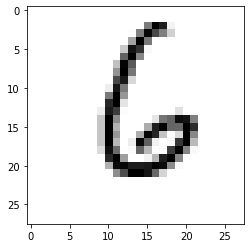

In [23]:
#Data preparation
train_data_input = np.load('mnist_train_data.npy')
test_data_input = np.load('mnist_test_data.npy')

train_label = np.load('mnist_train_labels.npy')
test_label = np.load('mnist_test_labels.npy')

train_data = np.divide(train_data_input,255)
test_data = np.divide(test_data_input,255)

train_labels_y = keras.utils.to_categorical(train_label)
test_labels_y = keras.utils.to_categorical(test_label)

training_data, validation_data, training_y, validation_y = skl.train_test_split(train_data,train_labels_y, test_size=0.3)

print(data_train_input.shape)
print(data_test_input.shape)

plt.imshow(train_data_input[1].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

In [11]:
es = EarlyStopping(patience = 15, restore_best_weights=True)

In [14]:
model = Sequential([
        Flatten(input_shape=(28,28,1)),
        Dense(64, activation='relu'),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer='Adam', loss='categorical_crossentropy')
history = model.fit(training_data, training_y, batch_size=300, epochs=400, callbacks=[es], validation_data=(validation_data,validation_y), verbose=0)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_13 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________


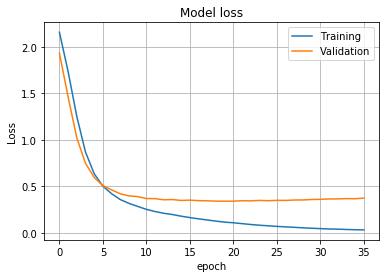

Accuracy score:  0.916
Predictions:  [2 5 7 8 7 8 8 1 4 4 3 1 2 4 5 3 4 4 2 9 2 9 0 3 8 6 7 7 6 7 7 4 6 8 4 6 9
 3 1 2 0 6 7 6 6 3 1 8 8 3 6 2 2 2 5 4 2 8 4 3 0 5 8 5 0 9 5 6 8 0 7 0 2 0
 4 3 2 6 2 3 3 8 5 2 1 1 4 6 2 8 7 4 9 4 2 6 2 4 3 9 4 3 4 0 9 1 5 7 5 6 8
 4 5 5 2 6 8 5 1 8 3 6 2 7 6 0 4 5 3 3 5 3 4 3 4 8 8 6 7 3 3 2 9 2 1 9 2 9
 4 3 6 3 2 9 2 5 3 0 4 6 7 2 2 8 6 0 9 7 2 8 3 1 7 1 2 8 9 6 7 4 7 4 4 9 4
 0 6 0 2 4 9 8 7 6 0 1 4 9 3 0 7 5 3 4 6 8 9 0 1 8 2 8 6 7 2 3 3 2 8 2 5 2
 3 8 5 1 6 8 3 0 8 9 1 3 1 5 5 1 4 0 7 5 2 8 1 9 2 7 1 5 0 1 0 5 0 1 1 7 7
 5 1 1 1 4 3 7 7 8 3 6 5 0 7 0 4 5 8 5 2 8 1 8 2 9 2 0 3 7 3 4 7 4 1 9 1 7
 8 3 1 5 7 2 4 4 9 3 3 5 2 2 3 2 2 3 9 6 3 8 6 7 5 6 3 2 9 5 7 8 7 7 8 8 3
 9 6 2 7 3 7 8 4 9 0 6 9 5 0 1 2 9 8 7 1 3 1 7 4 7 7 1 5 9 7 5 3 4 8 0 8 3
 8 4 3 2 7 5 9 9 0 7 9 7 2 7 0 0 8 6 3 8 4 4 0 8 8 0 1 1 3 4 6 1 2 1 6 8 1
 0 3 1 3 3 1 2 2 6 6 2 5 5 2 1 1 3 0 3 3 9 6 3 9 5 3 9 1 9 4 1 4 2 8 4 1 6
 1 7 0 9 7 5 0 6 8 2 0 6 7 3 7 9 7 9 3 6 6 1 6 2 7 3 0 9 9 6 8 

In [16]:
#Plotting results
plt.figure()
plt.grid()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Training','Validation'],loc='upper right')
plt.show()

score = accuracy_score(label_test , y_pred)
print('Accuracy score: ', score)
y_pred = model.predict_classes(data_test)
print('Predictions: ', y_pred)
conf = confusion_matrix(label_test , y_pred)
print('Confusion matrix: ', conf)

In [17]:
model_cnn = Sequential([
        Conv2D(16, kernel_size=3, activation='relu', input_shape=(28,28,1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, kernel_size=3, activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax'),
])

model_cnn.summary()

model_cnn.compile(optimizer='Adam', loss='categorical_crossentropy')
history_cnn = model_cnn.fit(training_data, training_y, batch_size=300, epochs=400, callbacks=[es], validation_data=(validation_data,validation_y), verbose=0)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                51264     
_________________________________________________________________
dense_16 (Dense)             (None, 10)               

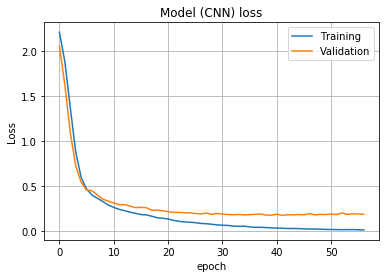

Accuracy score:  0.968
Predicted digit: 
 [2 5 7 8 9 8 8 1 4 4 3 1 2 4 5 3 4 4 2 9 2 9 0 3 8 6 7 7 6 7 7 4 6 8 4 6 9
 3 1 2 0 6 7 2 6 5 1 8 8 3 6 2 3 2 5 4 2 8 4 9 0 5 8 5 0 9 5 6 8 0 7 0 6 0
 4 3 2 6 2 3 3 8 5 2 1 1 4 6 2 2 7 4 9 4 2 6 2 7 3 4 9 8 4 0 9 1 5 7 5 6 8
 4 8 5 2 6 8 4 1 8 3 6 2 7 6 0 4 5 3 3 5 3 4 3 4 9 1 6 7 3 3 2 9 2 1 9 2 9
 0 3 6 3 2 9 2 5 3 0 4 6 7 2 2 8 6 0 9 7 2 8 3 1 7 1 2 8 9 6 7 4 7 4 4 9 4
 0 6 0 2 4 9 8 7 2 0 1 4 9 3 0 7 5 3 4 5 8 9 0 1 8 2 8 6 7 2 3 3 2 8 2 5 2
 3 8 5 1 6 8 3 0 8 9 1 3 1 5 5 1 4 0 7 5 2 8 1 9 2 7 1 5 0 1 0 5 0 1 1 7 7
 5 1 1 1 4 3 7 7 8 3 6 5 0 7 0 4 5 8 5 2 8 1 8 2 9 2 0 3 7 3 4 7 4 1 9 1 7
 8 3 1 5 7 2 4 4 9 2 3 5 2 2 3 2 2 3 9 6 3 8 6 7 5 6 3 2 9 5 7 8 7 7 8 3 3
 9 6 2 7 3 7 8 4 9 0 6 9 5 0 1 2 9 8 5 1 3 1 7 4 7 7 1 5 9 7 5 3 4 8 0 8 2
 8 5 3 2 7 5 9 9 0 7 9 7 8 7 0 0 8 6 3 8 9 4 0 8 8 0 1 1 3 4 6 1 7 1 6 8 1
 0 3 1 3 3 1 2 2 6 6 2 0 5 2 1 1 3 0 3 3 7 6 3 9 5 3 9 1 9 4 1 4 2 8 4 1 6
 1 7 0 9 7 5 0 6 8 2 0 6 7 3 7 9 7 9 8 6 6 1 6 2 7 3 0 9 8

In [21]:
plt.figure()
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('Model (CNN) loss')
plt.grid()
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Training','Validation'],loc='upper right')
plt.show()

score = accuracy_score(label_test , y_pred)
print('Accuracy score: ', score)
y_pred = model_cnn.predict_classes(data_test)
print('Predicted digit: \n', y_pred)
conf = confusion_matrix(label_test , y_pred)
print('Confusion Matrix: \n', conf)

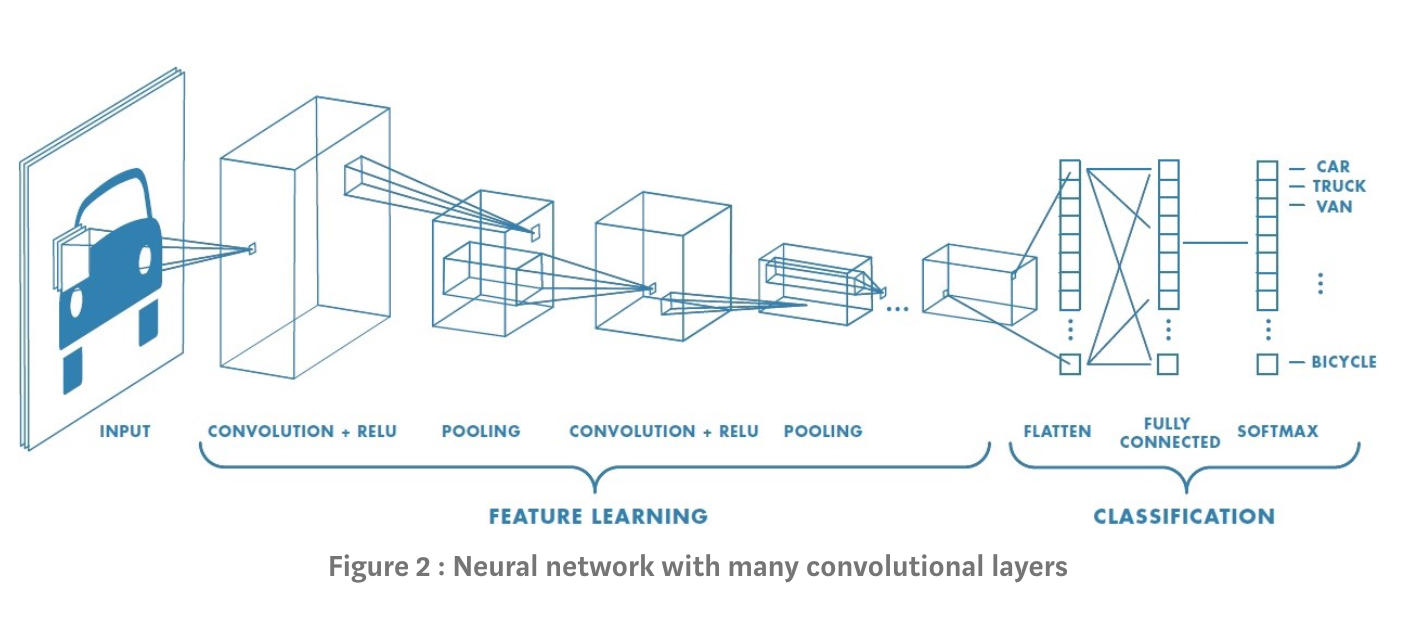
Source: https://medium.com/@RaghavPrabhu/understanding-of-convolutional-neural-network-cnn-deep-learning-99760835f148